## Imports


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn import preprocessing

## Data Loading

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train[5000:7000]
# x_train = np.array([(x-x.min())/(x.max()-x.min()) for x in x_train])
y_train = y_train[5000:7000]

x_test = x_test[2000:3000]
# x_test = np.array([(x-x.min())/(x.max()-x.min()) for x in x_test])
y_test = y_test[2000:3000]

<BarContainer object of 10 artists>

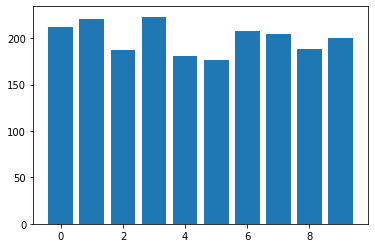

In [ ]:
train_class_counts = [0 for i in range(10)]
for num in y_train:
  train_class_counts[num]+=1

plt.bar([i for i in range(10)],train_class_counts)

<BarContainer object of 10 artists>

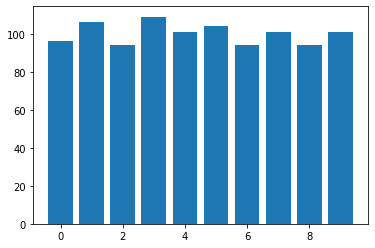

In [ ]:
test_class_counts = [0 for i in range(10)]
for num in y_test:
  test_class_counts[num]+=1

plt.bar([i for i in range(10)],test_class_counts)

## Self Organizing Map Implementation

In [ ]:
def find_adjacency(adjacency_dim, adjacency_shape, m, R, J):
  adjacents = []
  if adjacency_dim == 1:
    adjacents = [i for i in range(J-R, J+R+1) if -1<i<m]
    return adjacents
  elif adjacency_dim == 2:
    y = adjacency_shape[0]
    x = adjacency_shape[1]
    J_x = J%x
    J_y = int(J/x)
    adjacents = [(j, i) for i in range(J_x-R, J_x+R) for j in range(J_y-R, J_y+R) if -1<i<x and -1<j<y]
    return [j*x + i for (j, i) in adjacents]

In [ ]:
def train_SOM(adjacency_shape, m, R, inputs, epochs):
  d = len(inputs)
  n = len(inputs[0])*len(inputs[0][0])
  adjacency_dim = len(adjacency_shape)
  ## Step 0
  w = np.array([np.random.normal(0.5, 0.1, m) for j in range(n)])
  lr = 0.18
  ## Step 1
  for epoch in range(epochs):
    ## Step 2
    for x in np.array(inputs):
      x = x.reshape(n)
      ## Step 3
      D = ((w.T - x)*(w.T - x)).sum(axis=1)
      ## Step 4
      J = np.argmin(D)
      ## Step 5
      adjacents = find_adjacency(adjacency_dim, adjacency_shape, m, R, J)
      for adj in adjacents:
        w.T[adj] = w.T[adj] + lr * (x - w.T[adj])
    ## Step 6
    lr = lr*0.3
    ## Step 7
    ## Step 8
  return w


In [ ]:
def test_SOM(w, inputs):
  result_nodes = []
  for x in inputs:
    x = x.reshape(784)
    D = ((w.T - x)*(w.T - x)).sum(axis=1)
    J = np.argmin(D)
    result_nodes.append(J)
  return np.array(result_nodes)

In [ ]:
def analyze_node_stats(test_X, test_Y, result_nodes, m):
  winner_nodes_stat = {}
  for i, winner_node in enumerate(result_nodes):
    if winner_node not in winner_nodes_stat:
      winner_nodes_stat[winner_node] = []
    winner_nodes_stat[winner_node].append(test_Y[i])
  y = [len(list(winner_nodes_stat.values())[i]) for i in range(len(winner_nodes_stat))]
  x = [str(node) for node in list(winner_nodes_stat.keys())]
  plt.figure(figsize=(10,8))
  plt.bar(x,y)
  return winner_nodes_stat

In [ ]:
def show_winners(winner_nodes_stat, w):
  columns = 5
  rows = len(winner_nodes_stat.keys())/columns + 1
  fig = plt.figure(figsize=(3*columns, 3*rows))
  for i,node in enumerate(list(winner_nodes_stat.keys())):
    fig.add_subplot(rows, columns, i+1)
    number = w.T[node].copy()
    number = number.reshape(28,28)
    # axes[i].set_title('Node = {}'.format(node))
    # axes[i].imshow(number, cmap="gray")
    plt.imshow(number, cmap="gray")
    plt.axis('off')
    plt.title('Node = {}'.format(node))

In [ ]:
def count_stat(stat):
  node_numbers = {}
  for node, numbers in stat.items():
    numbers_count = [0 for i in range(10)]
    for number in range(len(numbers_count)):
      numbers_count[number] = np.count_nonzero(np.array(numbers) == number)
    node_numbers[node] = numbers_count
    
  for node, numbers in node_numbers.items():
    node_table = []
    node_table.append([node if i==0 else '' for i in range(len([i for i in numbers if i != 0]))])
    node_table.append([i for i in range(len(numbers)) if numbers[i] != 0])
    node_table.append([i for i in numbers if i != 0])
    print(tabulate(np.array(node_table).T, headers=["Node","Number","Count"]))

## Linear Adjacency, R=0

In [ ]:
w = train_SOM([625], 625, 0, x_train, 50)

In [ ]:
result_nodes = test_SOM(w, x_test)

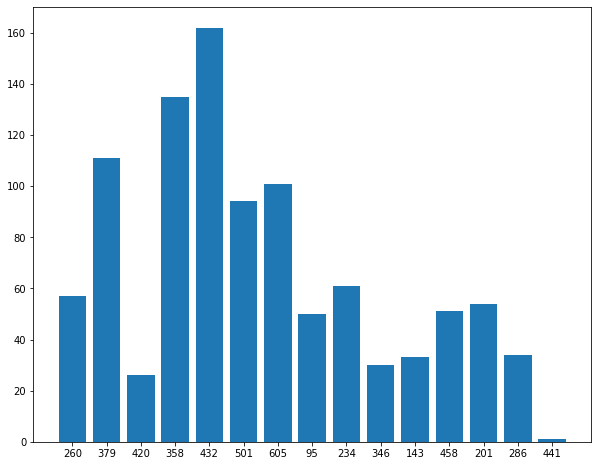

In [ ]:
winner_nodes_stat = analyze_node_stats(x_test, y_test, result_nodes, 625)

In [ ]:
count_stat(winner_nodes_stat)

Node      Number    Count
------  --------  -------
260            0        4
               1        1
               3        1
               4        1
               5        2
               6       48
Node      Number    Count
------  --------  -------
379            2        1
               4       39
               5        5
               6       21
               7        7
               8        3
               9       35
Node      Number    Count
------  --------  -------
420            0        5
               3        3
               5       15
               6        2
               9        1
Node      Number    Count
------  --------  -------
358            2        2
               3        1
               4       33
               5        8
               7       42
               8        9
               9       40
Node      Number    Count
------  --------  -------
432            0        1
               1        1
               2        9
            

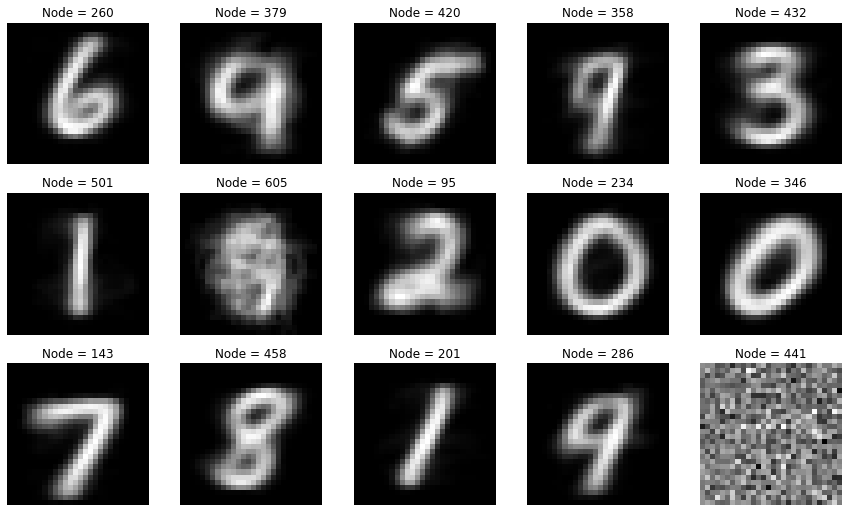

In [ ]:
show_winners(winner_nodes_stat, w)

## Linear Adjacency, R=2

In [ ]:
w2 = train_SOM([625], 625, 2, x_train, 30)

In [ ]:
result_nodes2 = test_SOM(w2, x_test)

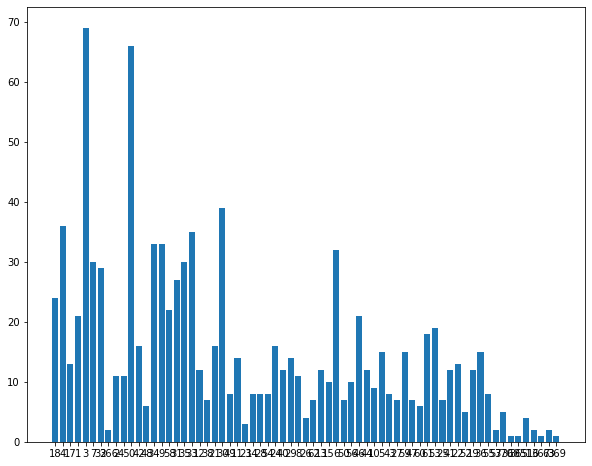

In [ ]:
winner_nodes_stat2 = analyze_node_stats(x_test, y_test, result_nodes2, 625)

In [ ]:
count_stat(winner_nodes_stat2)

  Node    Number    Count
------  --------  -------
    18         6       24
Node      Number    Count
------  --------  -------
4              2        1
               3        2
               4        9
               5        4
               7        6
               9       14
  Node    Number    Count
------  --------  -------
    17         6       13
Node      Number    Count
------  --------  -------
1              1        6
               3        3
               4        2
               5        3
               6        1
               8        1
               9        5
Node      Number    Count
------  --------  -------
3              2        2
               3        1
               4       24
               5       10
               7        3
               8        1
               9       28
Node      Number    Count
------  --------  -------
7              0        6
               4        4
               5        2
               6       12
            

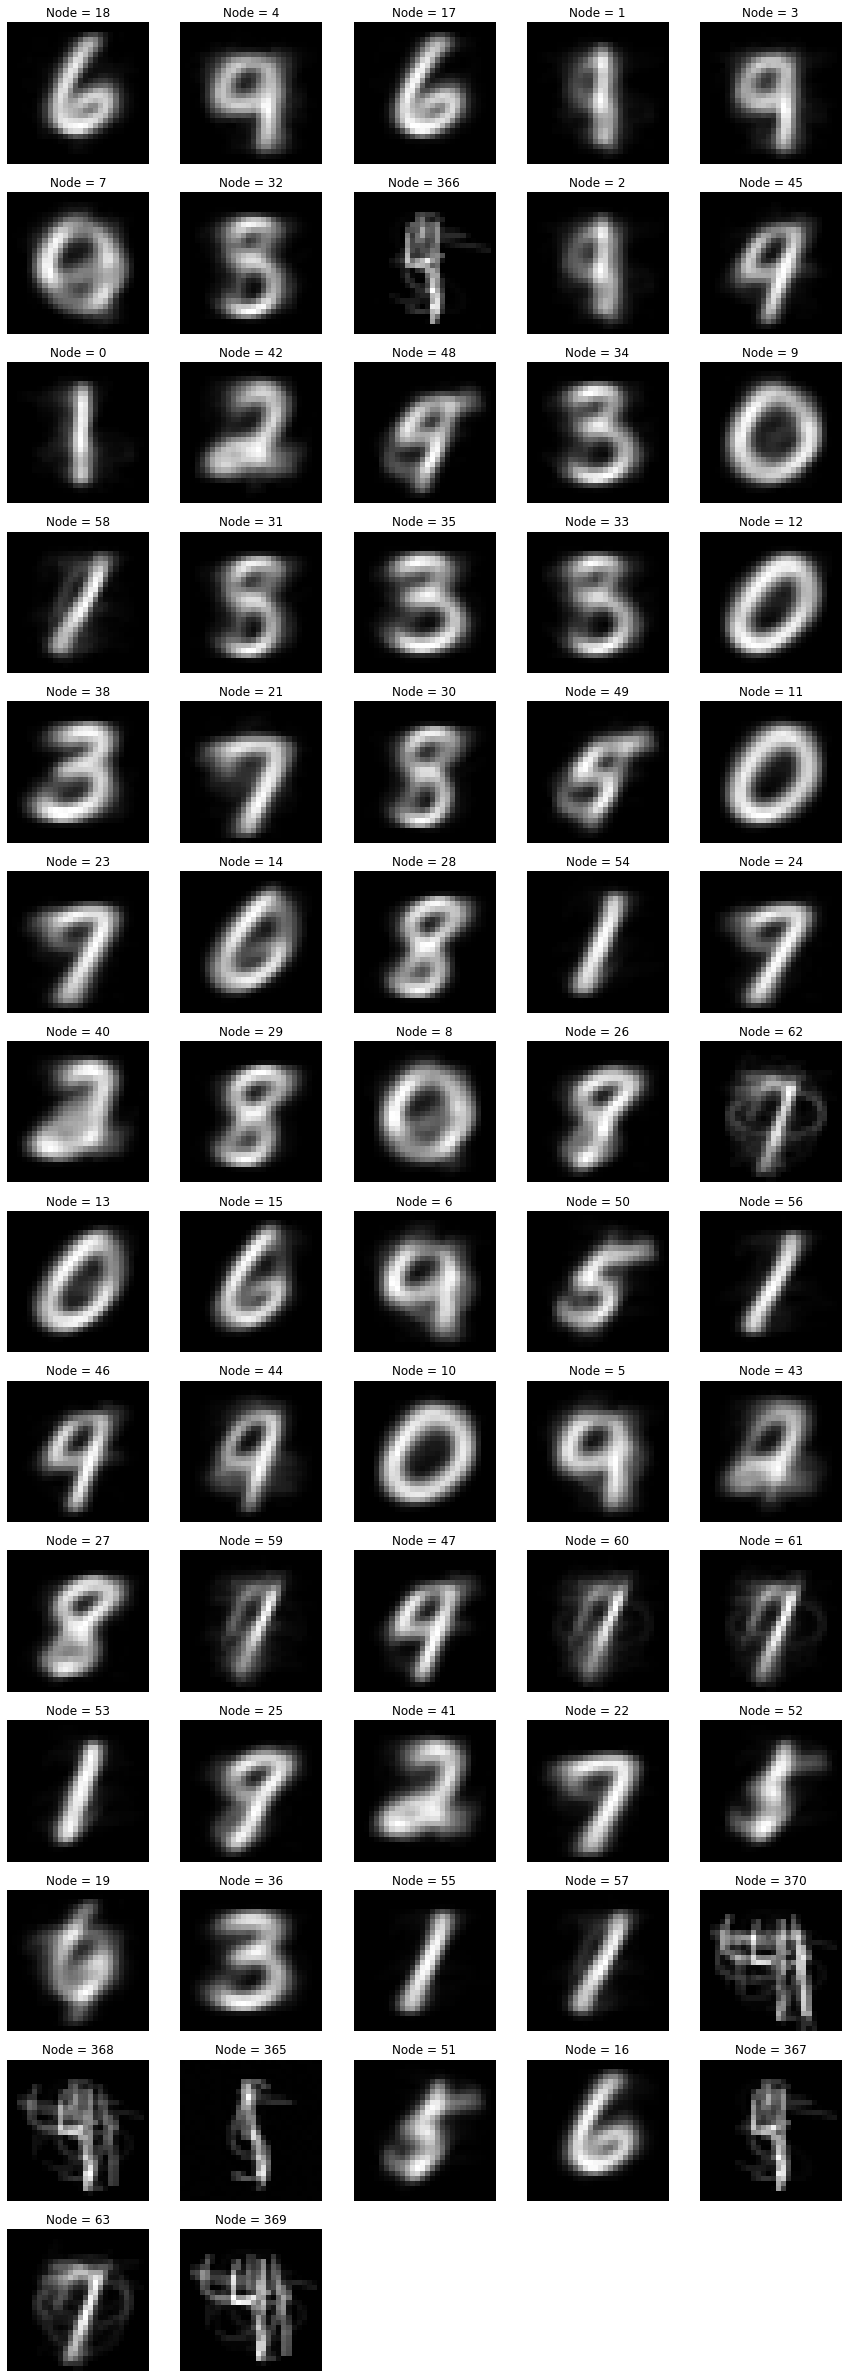

In [ ]:
show_winners(winner_nodes_stat2, w2)

## Square Adjacency, R=1

In [ ]:
w3 = train_SOM([25, 25], 625, 1, x_train, 30)

In [ ]:
result_nodes3 = test_SOM(w3, x_test)

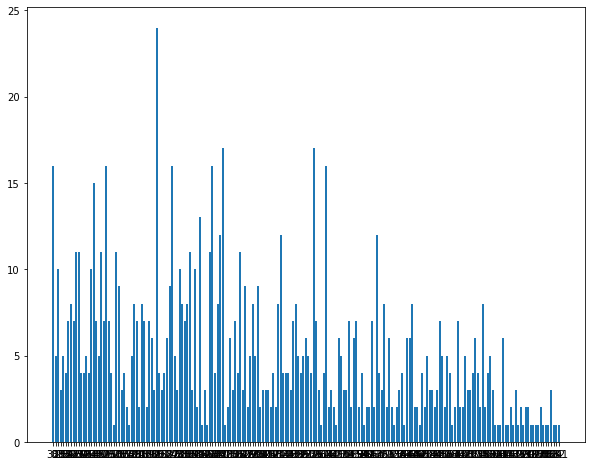

In [ ]:
winner_nodes_stat3 = analyze_node_stats(x_test, y_test, result_nodes3, 625)

In [ ]:
count_stat(winner_nodes_stat3)

  Node    Number    Count
------  --------  -------
     0         6       16
Node      Number    Count
------  --------  -------
308            5        2
               8        2
               9        1
Node      Number    Count
------  --------  -------
28             3        2
               5        5
               8        3
Node      Number    Count
------  --------  -------
333            3        2
               8        1
Node      Number    Count
------  --------  -------
259            4        1
               9        4
  Node    Number    Count
------  --------  -------
   336         6        4
Node      Number    Count
------  --------  -------
332            4        3
               7        1
               9        3
  Node    Number    Count
------  --------  -------
   342         3        8
  Node    Number    Count
------  --------  -------
   293         1        7
Node      Number    Count
------  --------  -------
255            4        5
            

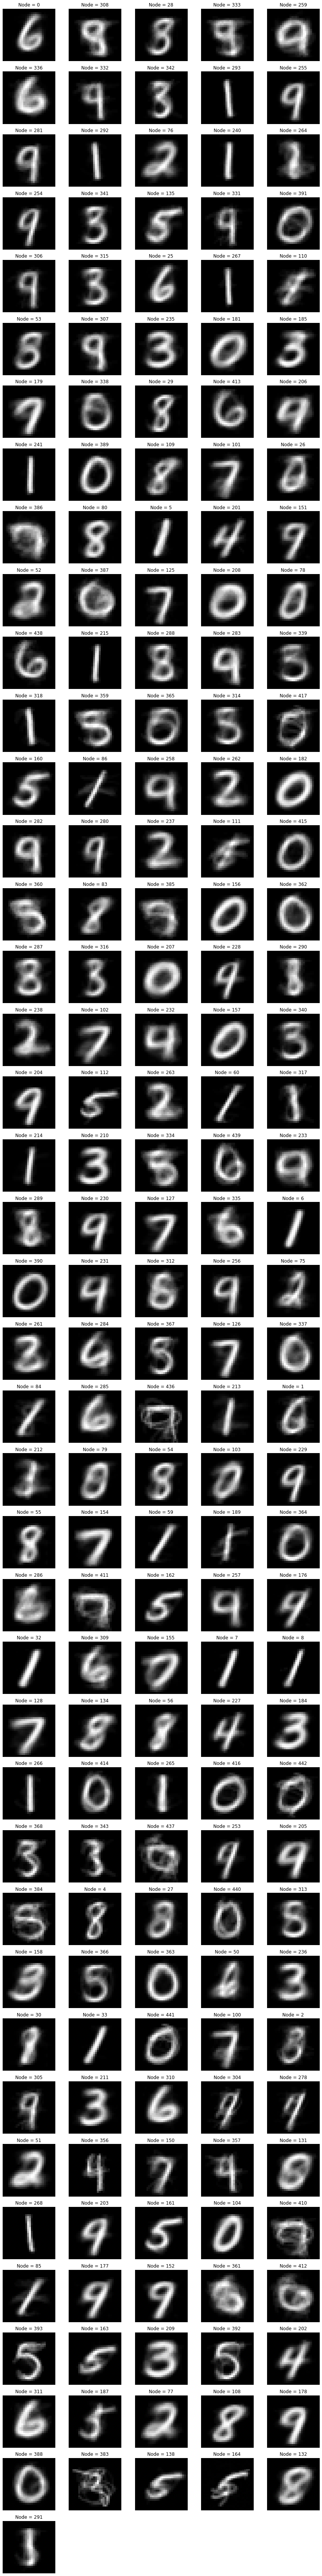

In [ ]:
show_winners(winner_nodes_stat3, w3)